In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr
import numpy as np
from statsmodels.stats.multitest import multipletests
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
sys.path.append("../../Utils")
from loaders import HNSCCFeatureHandler

METADATA_PATH = "../../Supplementary_Tables/ST1/RAW_HNSCC_METADATA_NEW_v10.csv"
VALID_IDS_PATH = "../../Utils/Lists/cv_ids.txt"
HOLD_IDS_PATH = '../../Utils/Lists/holdout_ids.txt'

hc_data = HNSCCFeatureHandler(METADATA_PATH, VALID_IDS_PATH, HOLD_IDS_PATH)
_ = hc_data.load_feature_to_dataframe("../../Data/*.hg38.frag.interval_mds.tsv", 0, 4)
z = hc_data.normalize_zscore()
_ = hc_data.merge_feature_metadata()

In [3]:
def correlation_with_category(df, category_col):
    from sklearn.preprocessing import LabelEncoder
    import numpy as np

    features = df.drop(columns=category_col)
    category = LabelEncoder().fit_transform(df[category_col])

    corrs = [np.corrcoef(category, features[col].values)[0, 1] for col in features.columns]
    return np.array(corrs)

In [4]:
institute_before=pd.concat([hc_data.get_raw_features(), hc_data.get_metadata_col('Institute')], axis=1)
institute_before = correlation_with_category(institute_before, 'Institute')
isolation_before=pd.concat([hc_data.get_raw_features(), hc_data.get_metadata_col('cfDNA Isolation Date')], axis=1)
isolation_before = correlation_with_category(isolation_before, 'cfDNA Isolation Date')
wgs_before=pd.concat([hc_data.get_raw_features(), hc_data.get_metadata_col('WGS Library Prep Date')], axis=1)
wgs_before = correlation_with_category(wgs_before, 'WGS Library Prep Date')
treatment_before=pd.concat([hc_data.get_raw_features(), hc_data.get_metadata_col('Treatment Response')], axis=1)
treatment_before = correlation_with_category(treatment_before, 'Treatment Response')

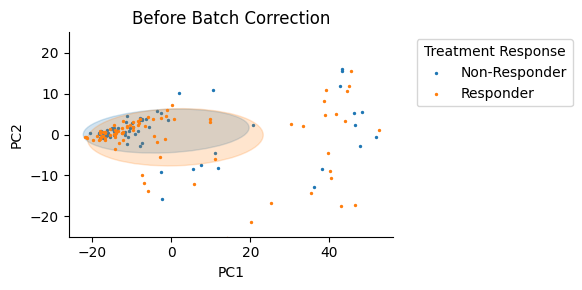

In [5]:
hc_data.pca("Treatment Response", scale=False, save_path='SF3.rMDS.TR_B.pdf', plot_ellipses=True)

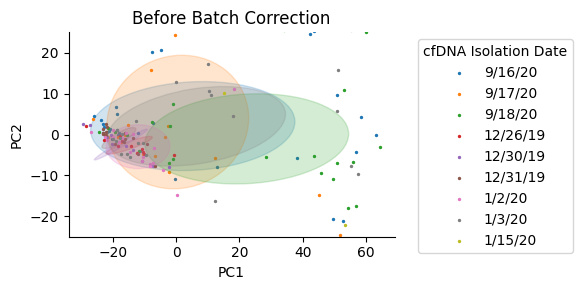

In [6]:
hc_data.pca("cfDNA Isolation Date", save_path='SF3.rMDS.Isolation_B.pdf', plot_ellipses=True)

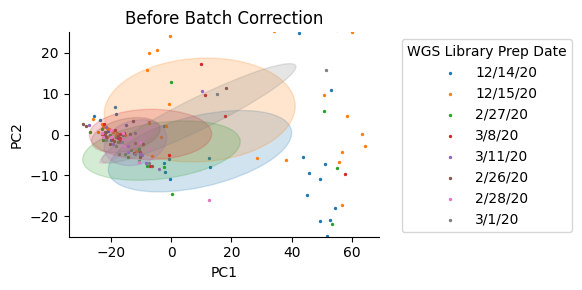

In [7]:
hc_data.pca("WGS Library Prep Date", save_path='SF3.rMDS.LibraryPrep_B.pdf', plot_ellipses=True)

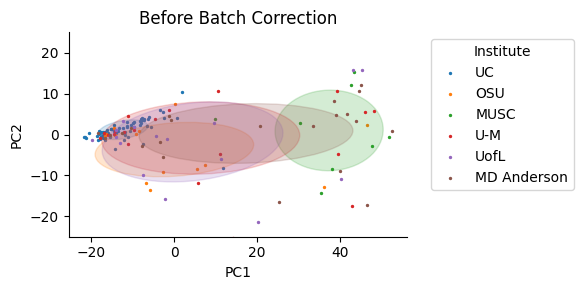

In [8]:
hc_data.pca("Institute", scale=False, save_path='SF3.rMDS.Institute_B.pdf', plot_ellipses=True)

In [9]:
z = hc_data.batch_correct()

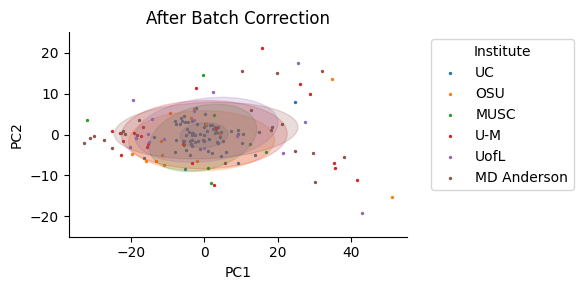

In [10]:
hc_data.pca("Institute", scale=False, save_path='SF3.rMDS.Institute_A.pdf', before=False, plot_ellipses=True)

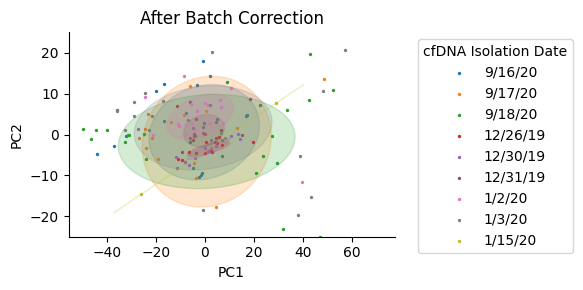

In [11]:
hc_data.pca("cfDNA Isolation Date", save_path='SF3.rMDS.Isolation_A.pdf', before=False, plot_ellipses=True)

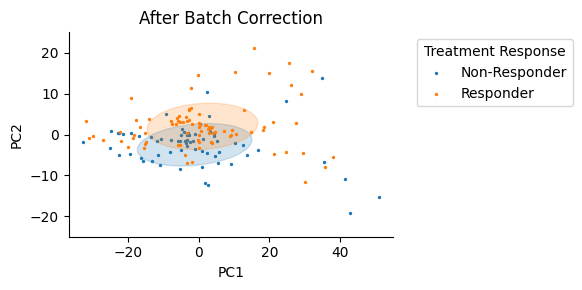

In [12]:
hc_data.pca("Treatment Response", scale=False, save_path='SF3.rMDS.TR_A.pdf', before=False, plot_ellipses=True)

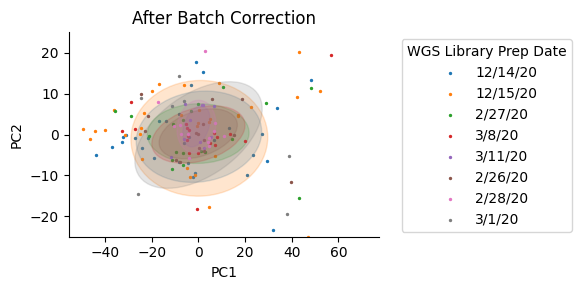

In [13]:
hc_data.pca("WGS Library Prep Date", save_path='SF3.rMDS.LibraryPrep_A.pdf', before=False, plot_ellipses=True)

In [14]:
institute_after=pd.concat([hc_data.get_raw_features(), hc_data.get_metadata_col('Institute')], axis=1)
institute_after = correlation_with_category(institute_after, 'Institute')
isolation_after=pd.concat([hc_data.get_raw_features(), hc_data.get_metadata_col('cfDNA Isolation Date')], axis=1)
isolation_after = correlation_with_category(isolation_after, 'cfDNA Isolation Date')
wgs_after=pd.concat([hc_data.get_raw_features(), hc_data.get_metadata_col('WGS Library Prep Date')], axis=1)
wgs_after = correlation_with_category(wgs_after, 'WGS Library Prep Date')
treatment_after=pd.concat([hc_data.get_raw_features(), hc_data.get_metadata_col('Treatment Response')], axis=1)
treatment_after = correlation_with_category(treatment_after, 'Treatment Response')

In [15]:
def plot_kde_two_arrays(array1, array2, name):
    plt.figure(figsize=(4, 4), dpi=1000)
    sns.kdeplot(array1, color='purple', fill=True, alpha=0.2, linewidth=2, label='Before')
    sns.kdeplot(array2, color='green', fill=True, alpha=0.2, linewidth=2, label='After')
    plt.xlim(-1, 1)
    plt.xlabel("Pearson Correlation")
    plt.legend(loc='upper right', frameon=False)
    plt.title(f'{name}')
    plt.tight_layout()
    plt.savefig(f'{name}.pdf')
    plt.show()

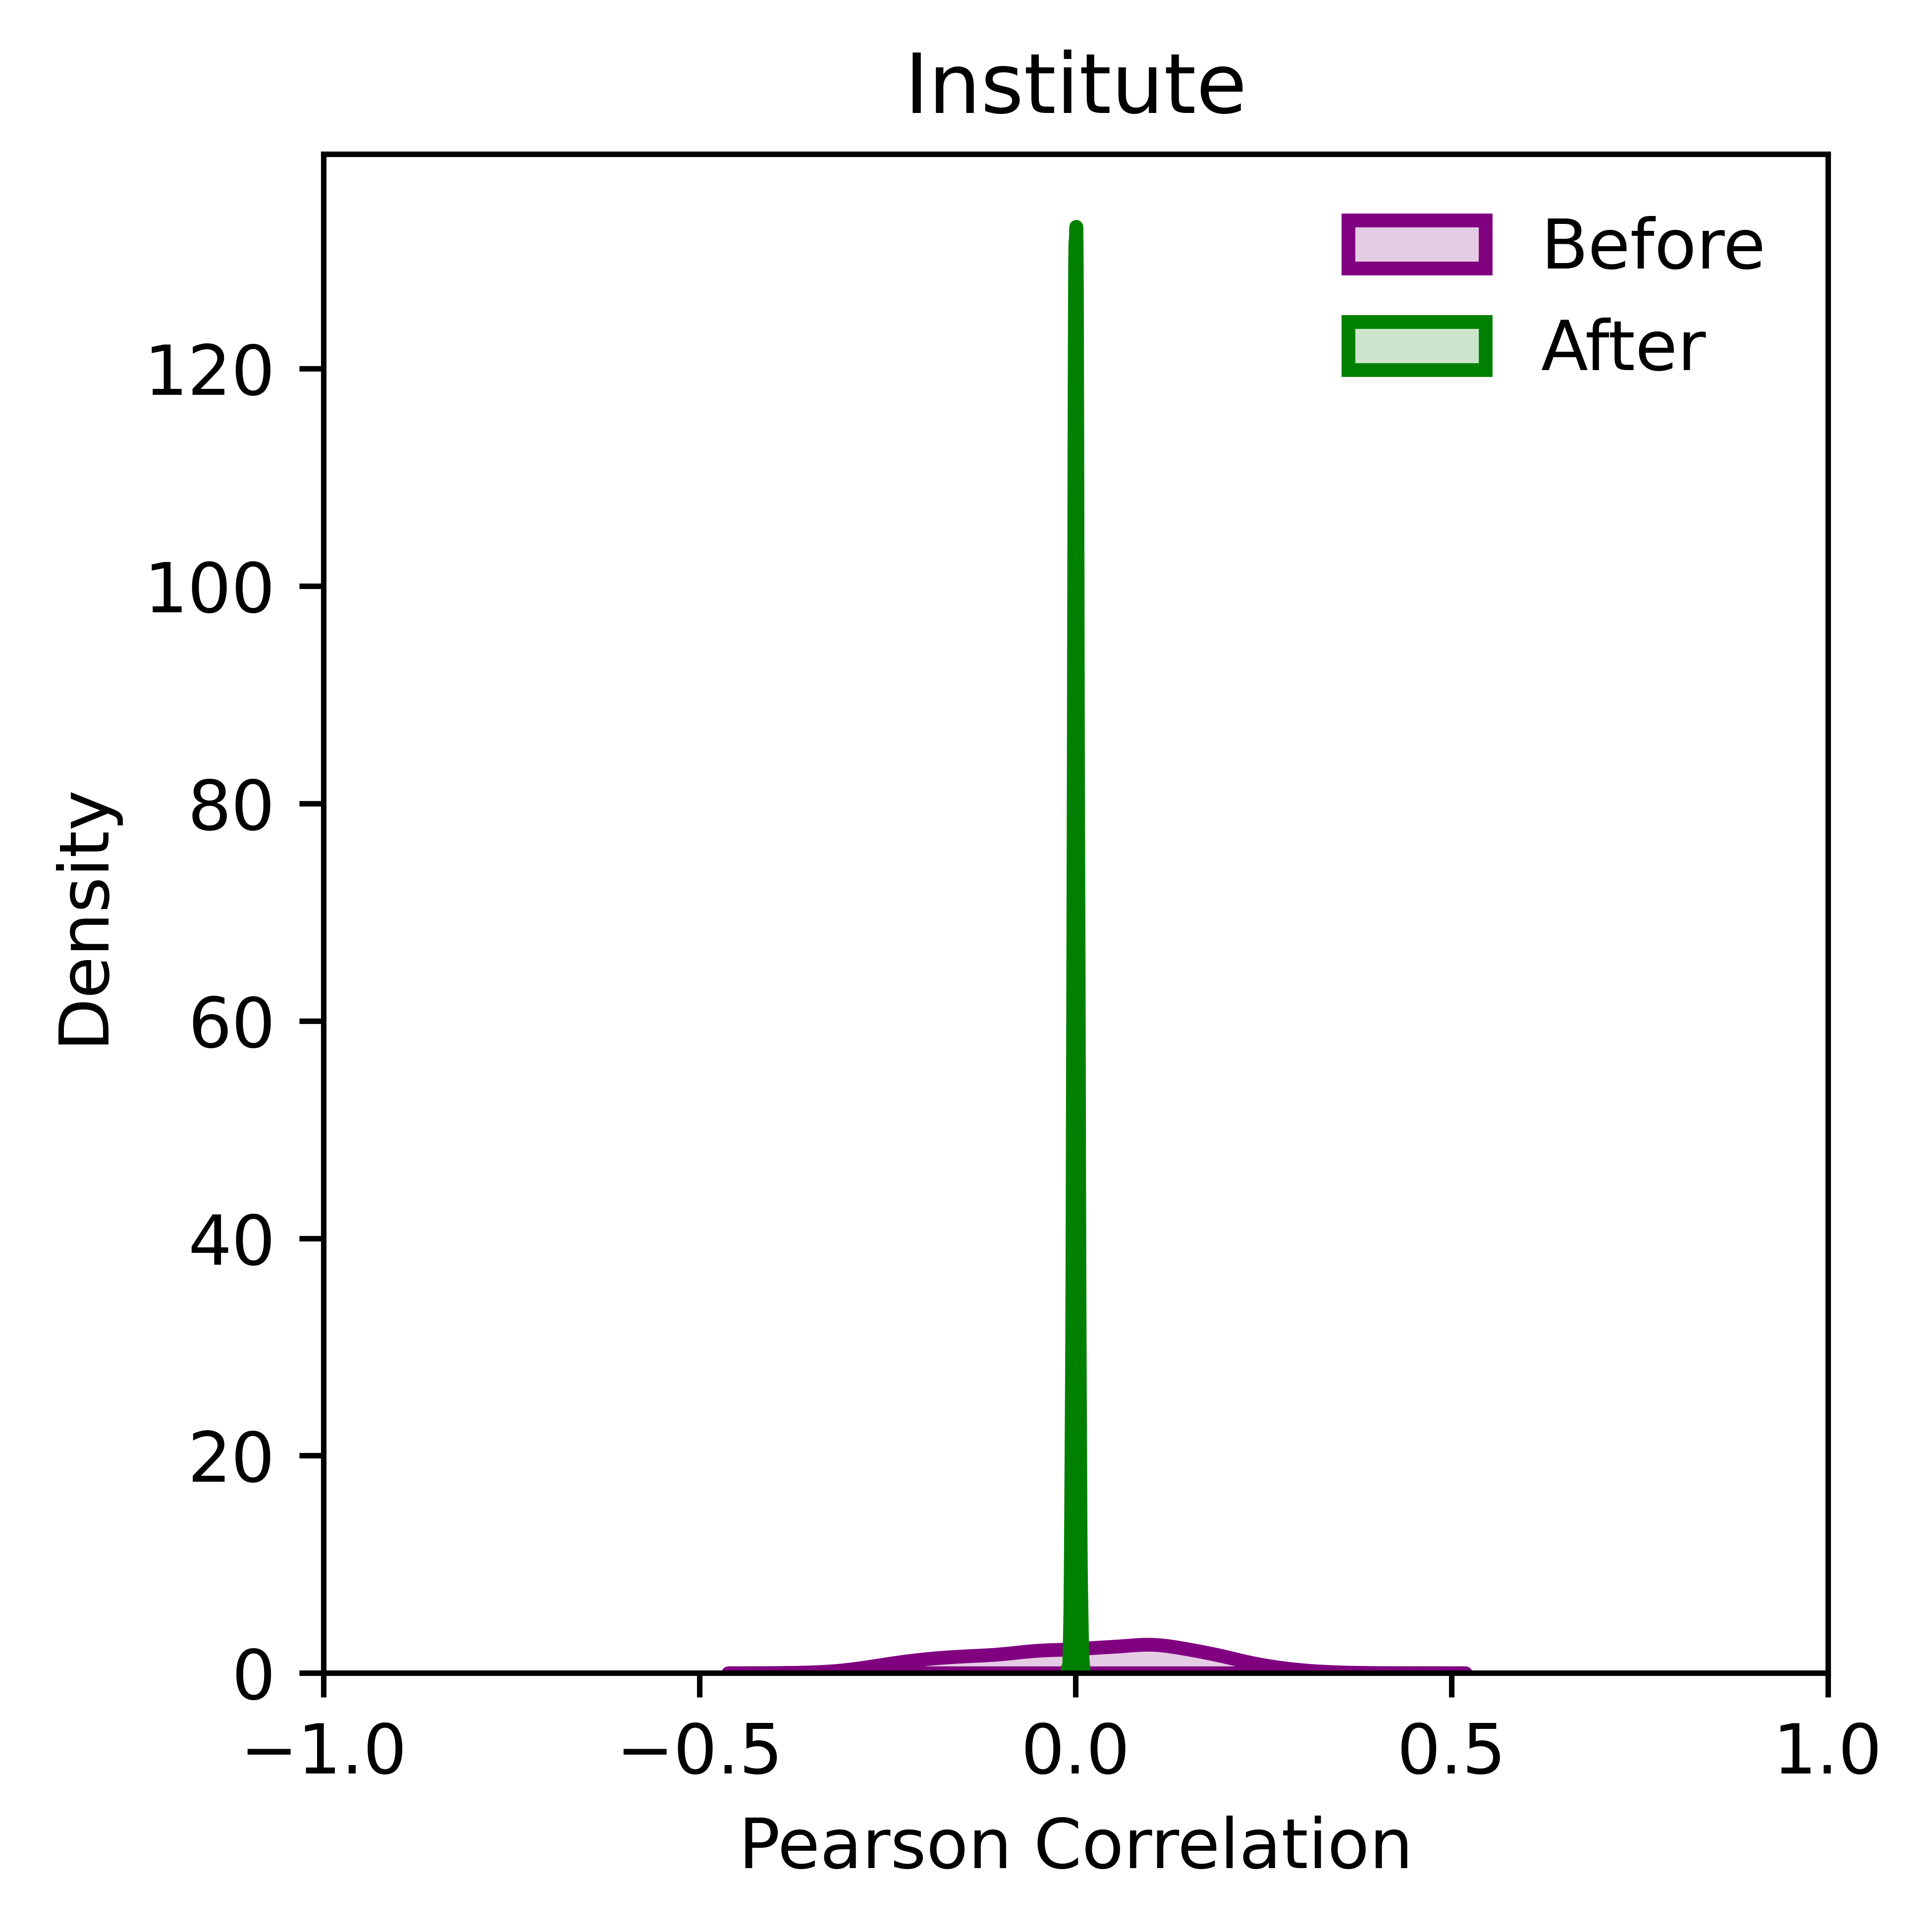

In [16]:
plot_kde_two_arrays(institute_before, institute_after, "Institute")

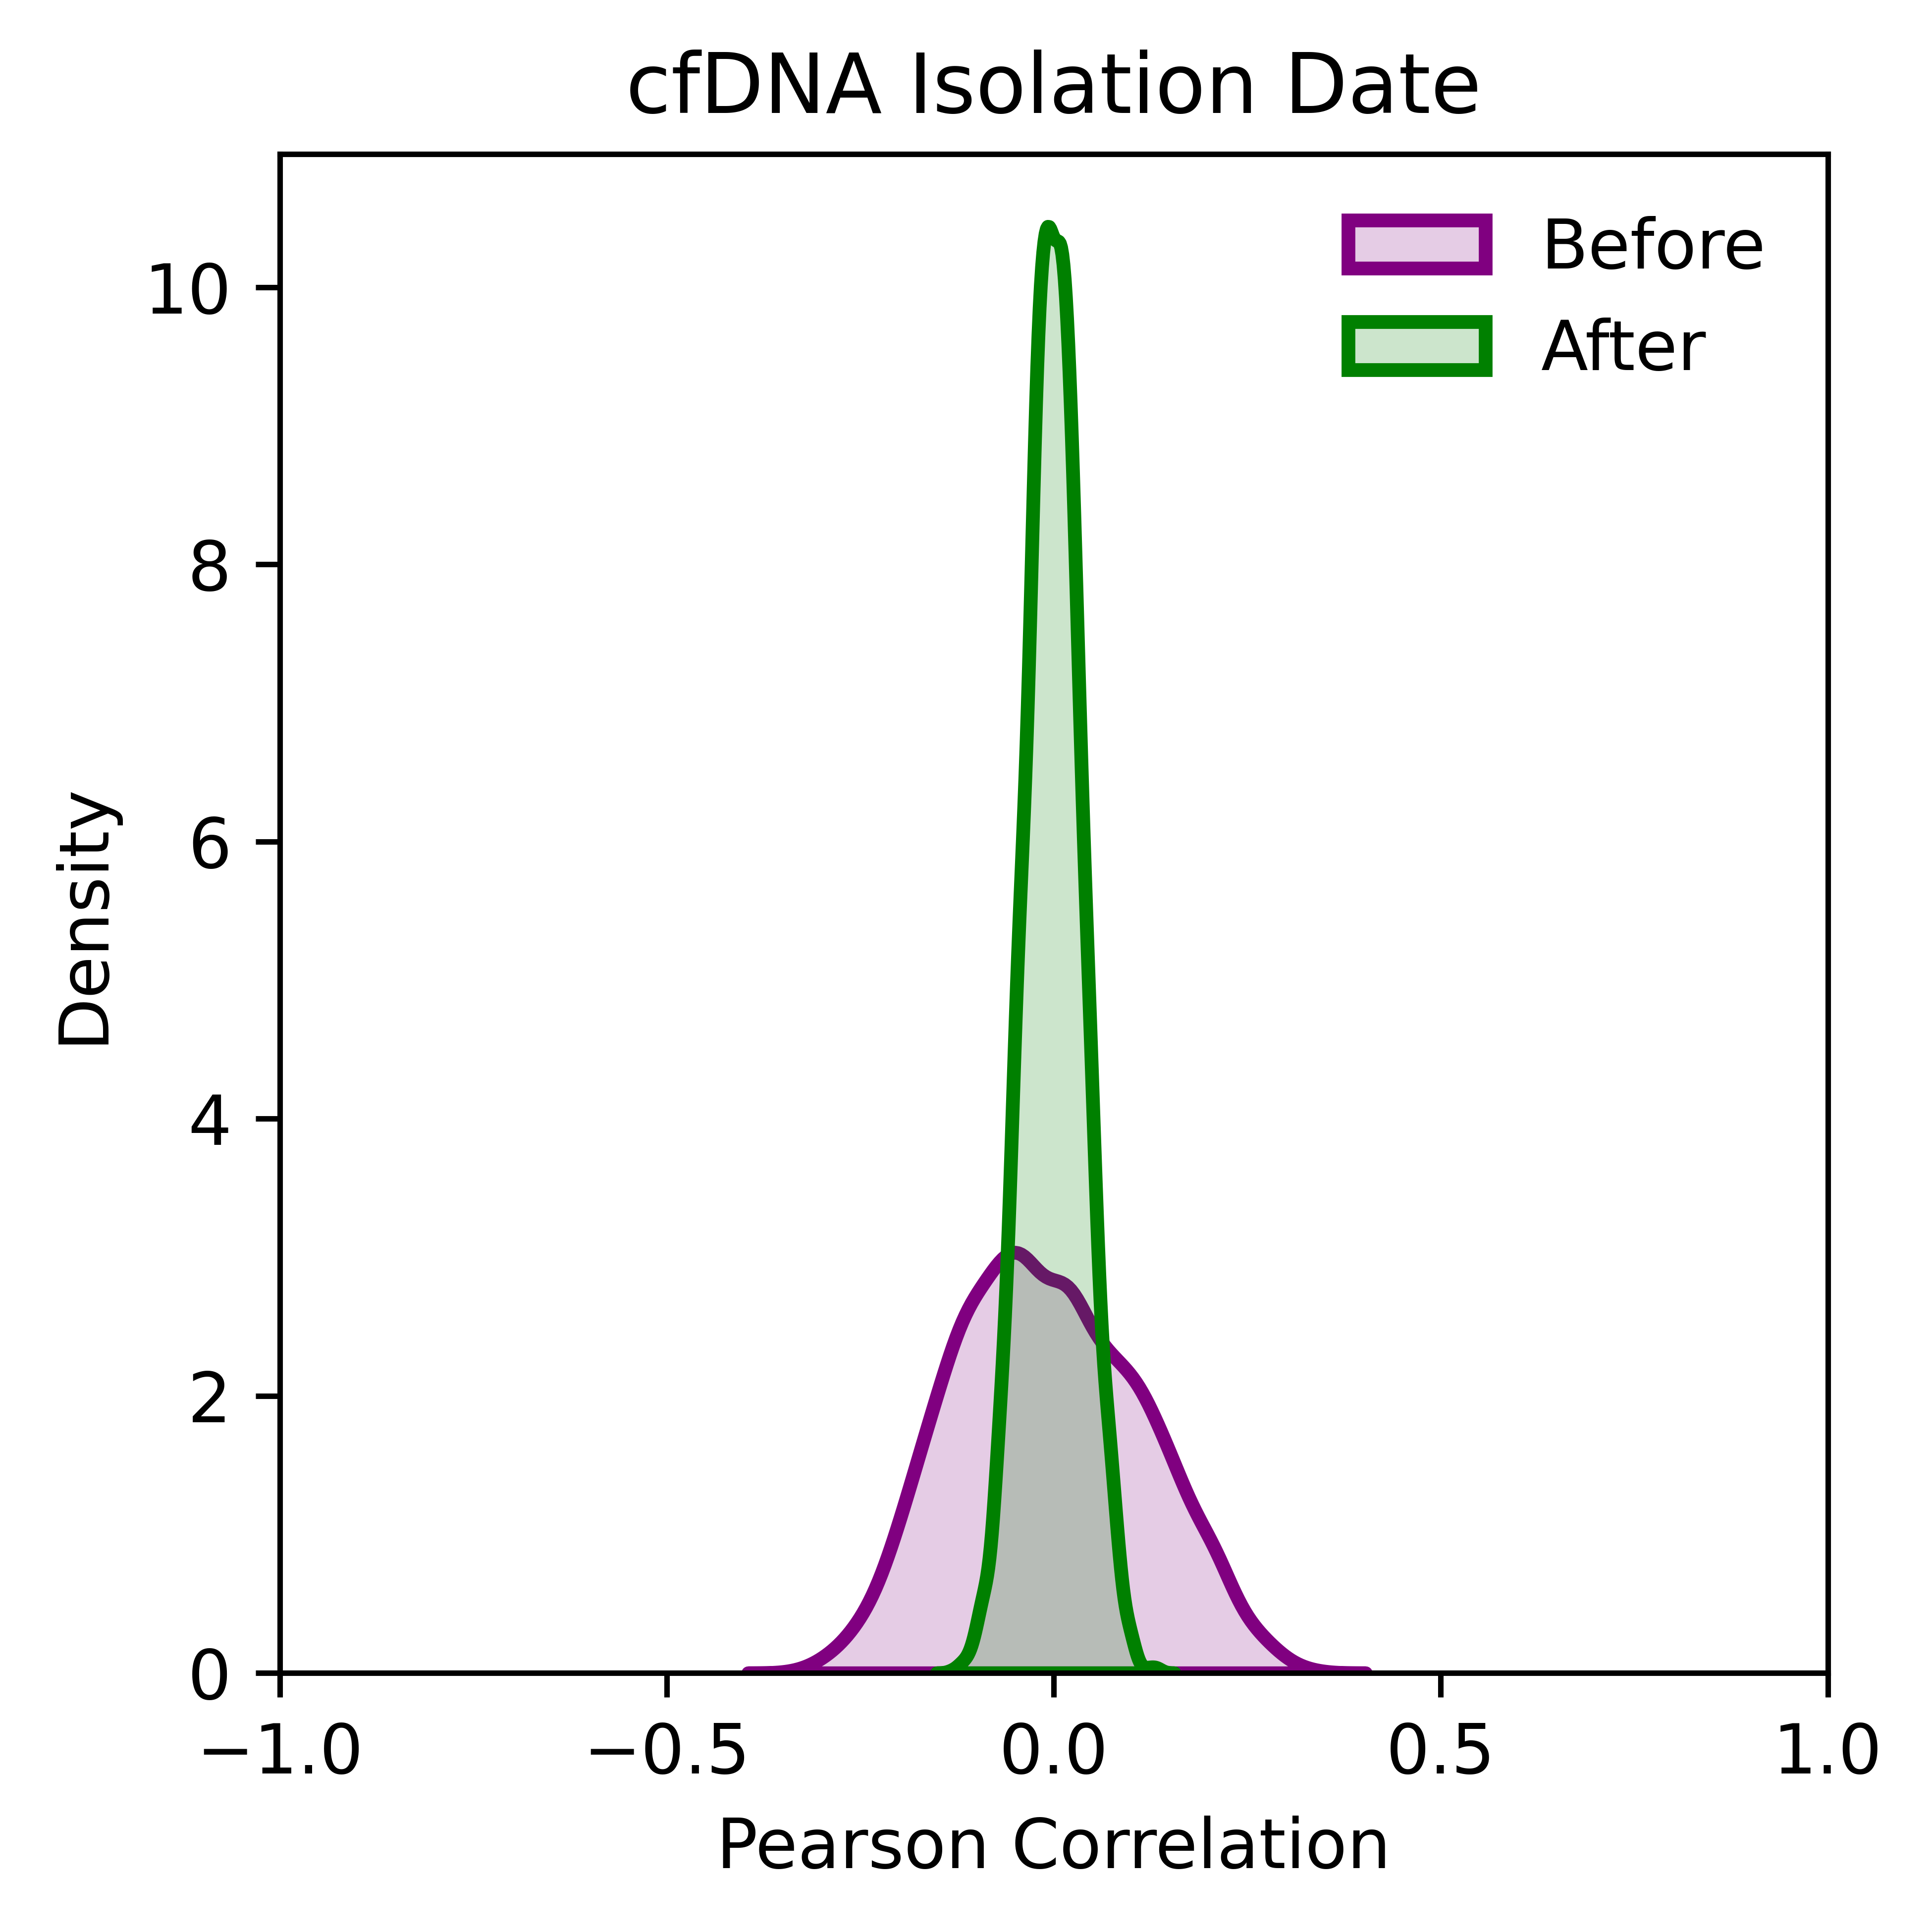

In [17]:
plot_kde_two_arrays(isolation_before, isolation_after, "cfDNA Isolation Date")

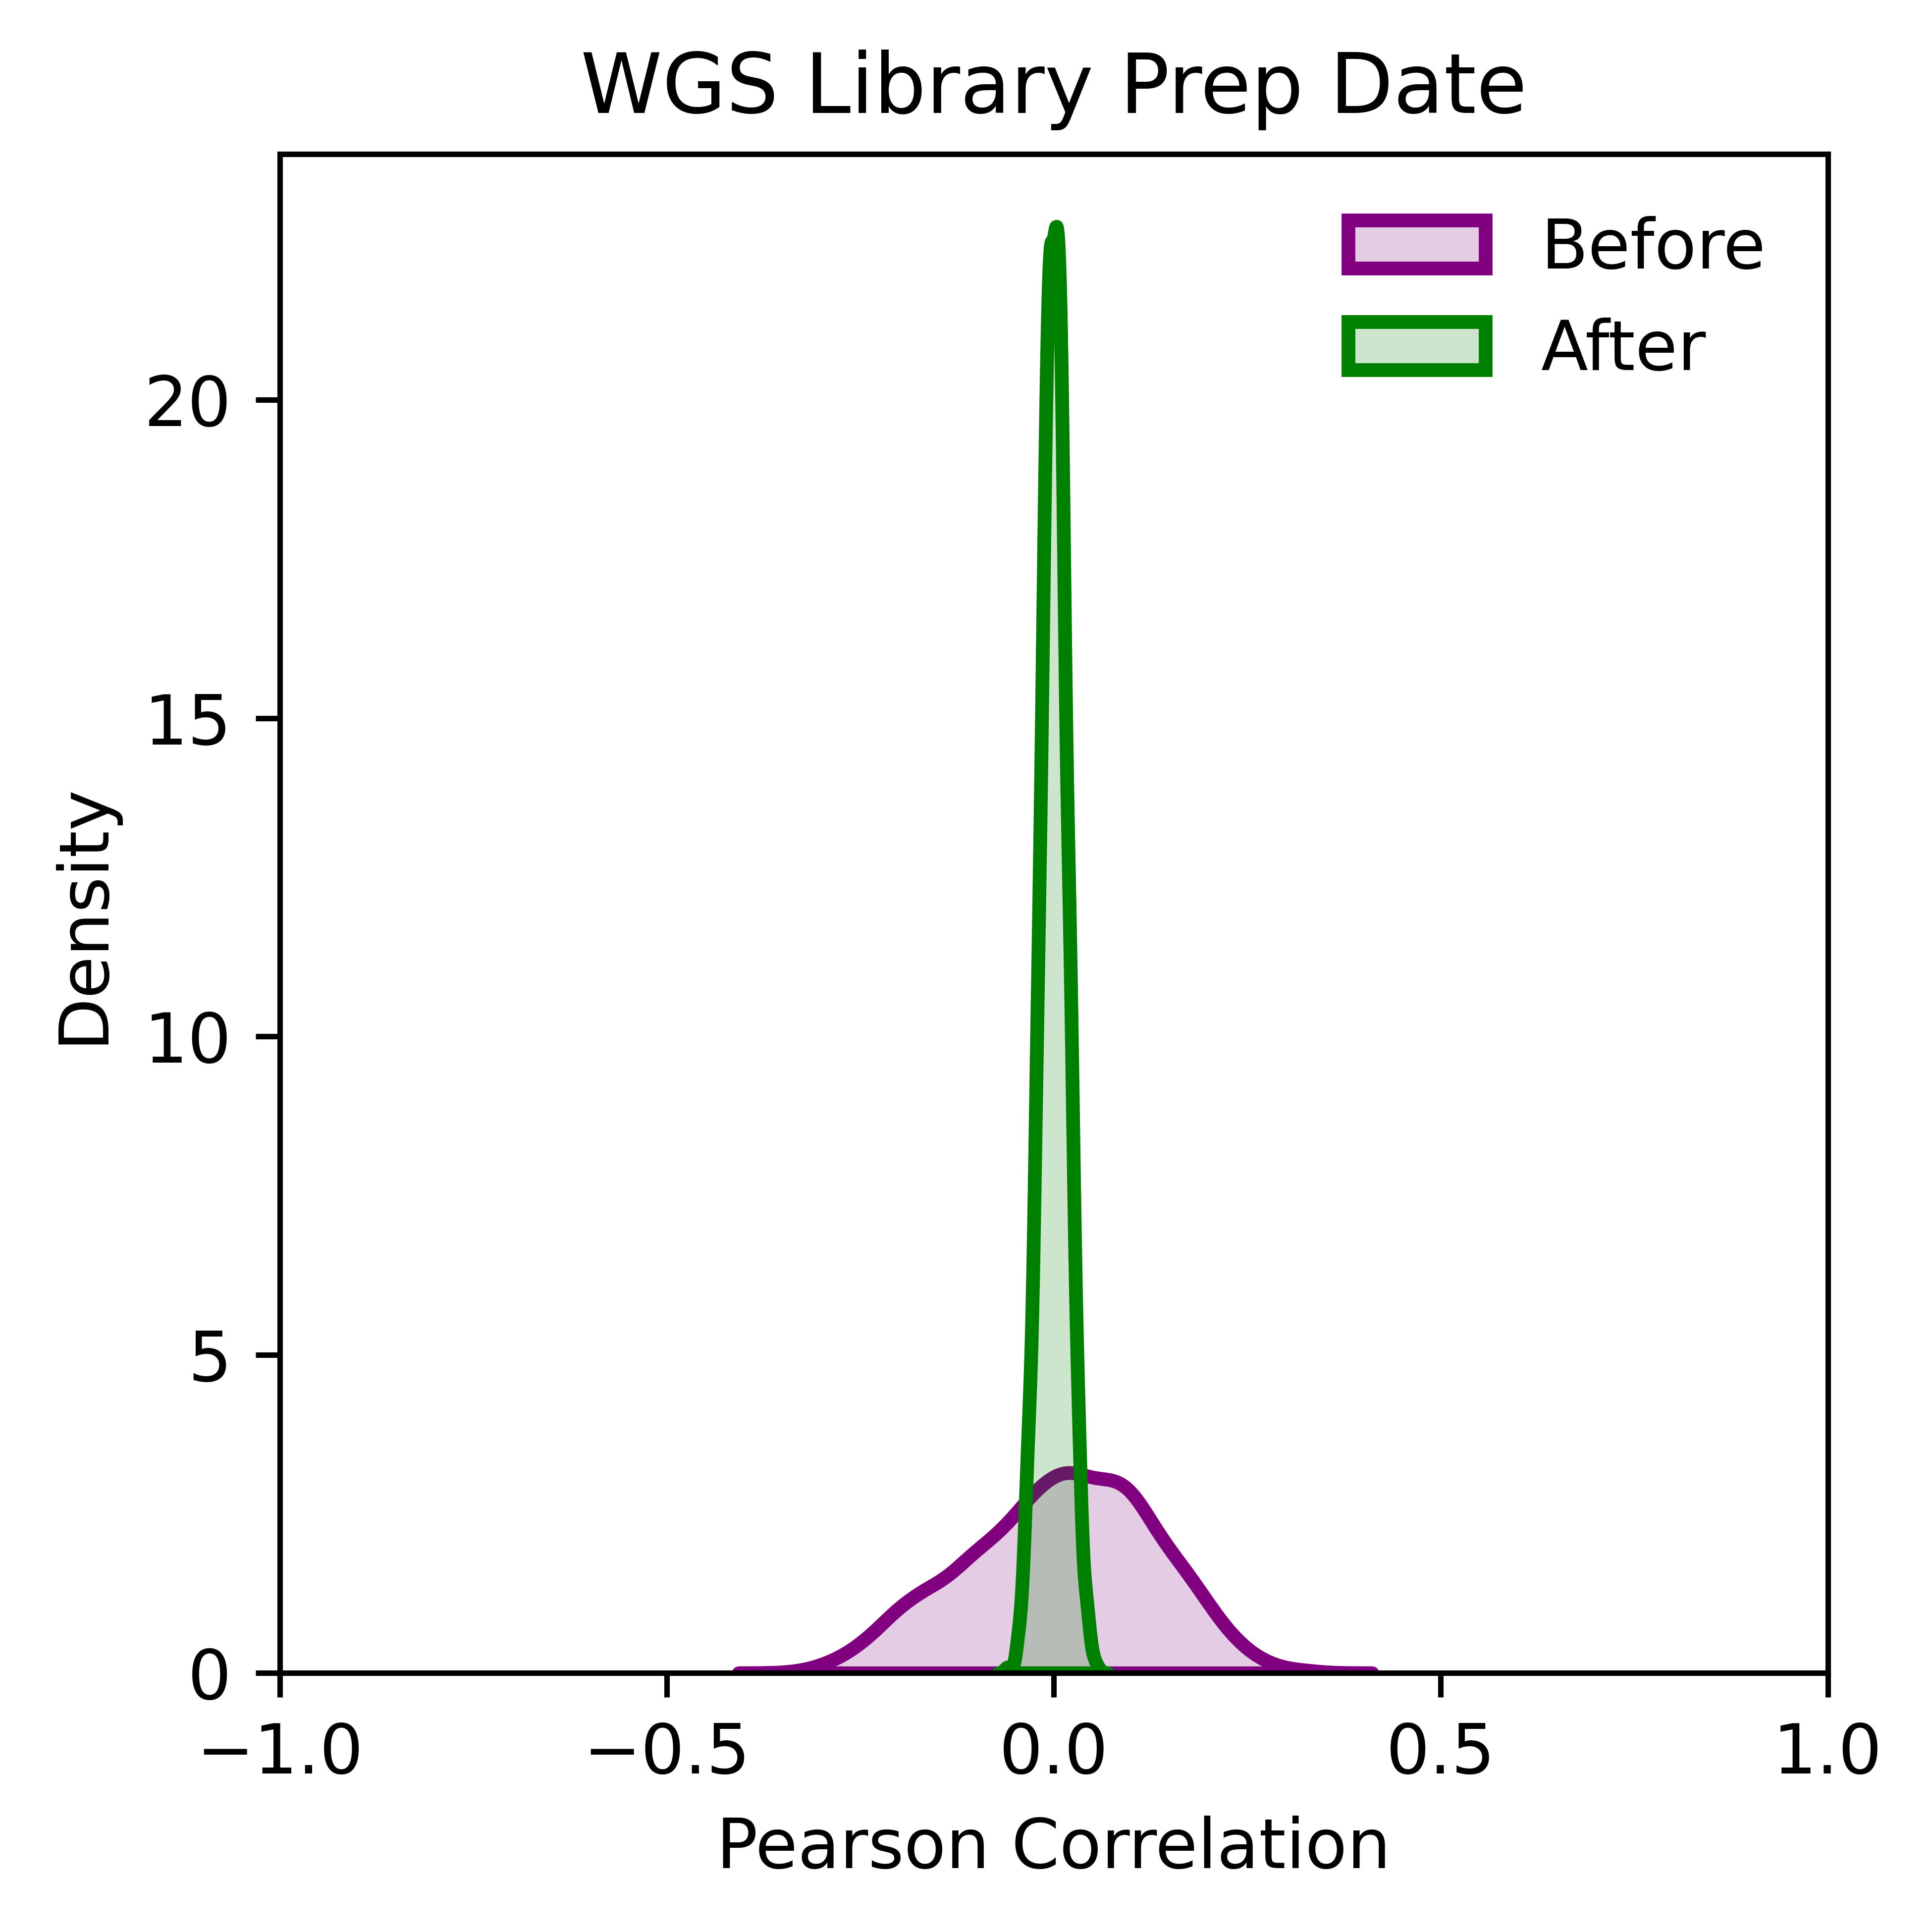

In [18]:
plot_kde_two_arrays(wgs_before, wgs_after, "WGS Library Prep Date")

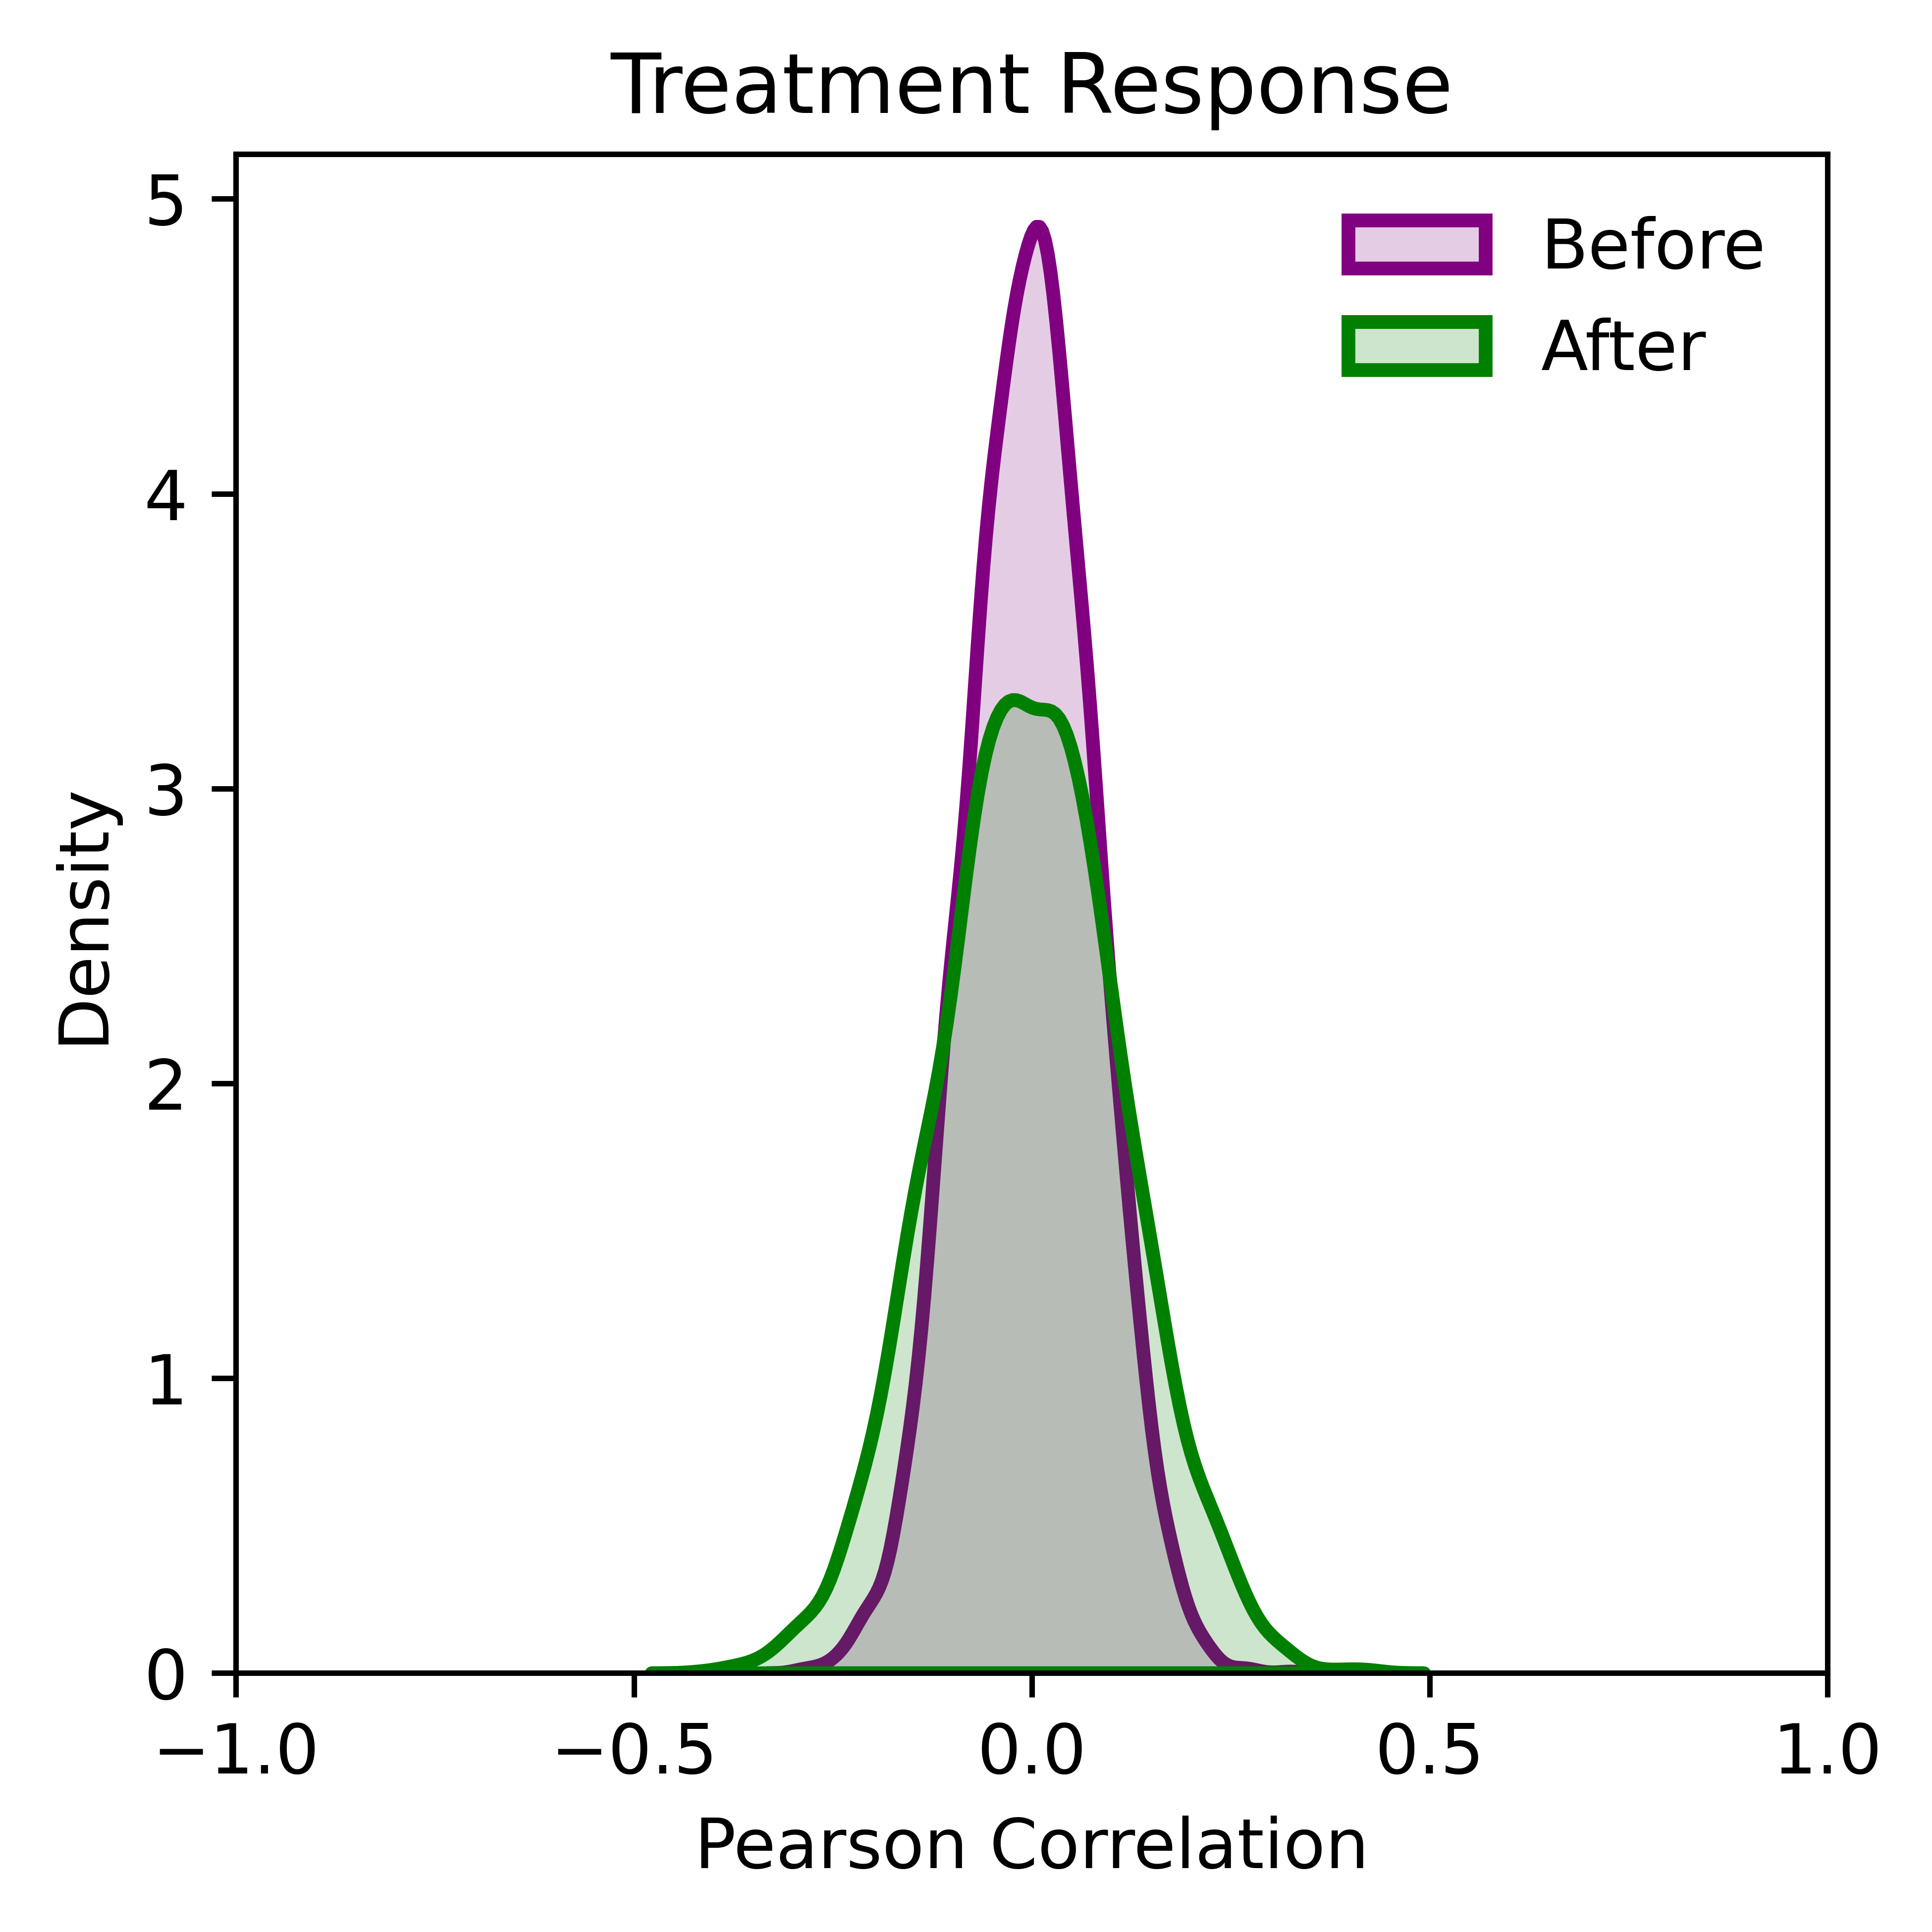

In [19]:
plot_kde_two_arrays(treatment_before, treatment_after, "Treatment Response")